## Clean stock prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Config: display 200 columns when printing dataset
pd.set_option("display.max_columns", 200)

# Config: setting default plot size 
plt.rcParams["figure.figsize"] = (16,16)

# Importing to avoid warning when ploting data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### 1) Reading stock price dataset (Y)

**1.1) Reading CSV file**

In [2]:
raw_y_df = pd.read_csv('../data/grendene-cotacao-raw.csv')
raw_y_df.head(3)

,Data,Fechamento,Abertura,Mínimo,Máximo
0,Oct-2004,1.708171,1.523836,1.523836,1.710629
1,Nov-2004,1.622148,1.724392,1.582823,1.767158
2,Dec-2004,1.548414,1.622148,1.482053,1.670321


**1.2) Transforming index from type object to datetime index**

In [3]:
raw_y_df['Data'] = pd.to_datetime(raw_y_df['Data'])
raw_y_df = raw_y_df.set_index('Data')

In [4]:
raw_y_df.head(2)

,Fechamento,Abertura,Mínimo,Máximo
Data,,,,
2004-10-01,1.708171,1.523836,1.523836,1.710629
2004-11-01,1.622148,1.724392,1.582823,1.767158


**1.3) Group data by quarter and get the quarter's first month results**

In [5]:
quarter_df = raw_y_df.resample('Q').first()
quarter_df.tail()

,Fechamento,Abertura,Mínimo,Máximo
Data,,,,
2018-09-30,7.491299,7.664397,7.491299,8.270240
2018-12-31,7.043209,6.531152,6.366907,7.719512
2019-03-31,8.892119,7.977612,7.802494,9.038051
2019-06-30,7.282305,8.162459,7.143405,8.347306
2019-09-30,7.583303,7.782864,7.343830,8.301721


In [6]:
quarter_df.describe()

,Fechamento,Abertura,Mínimo,Máximo
count,60.000000,60.000000,60.000000,60.000000
mean,3.461378,3.394741,3.219242,3.670122
std,2.562639,2.490516,2.407203,2.719571
min,0.674115,0.723135,0.596562,0.811382
25%,1.361628,1.243518,1.184131,1.390159
50%,2.107952,2.092107,1.955891,2.203975
75%,5.029023,4.859955,4.636037,5.241264
max,9.087896,8.839338,8.578352,9.632172


**1.4) Create new column with the information of the opening price of the quarter's following month**

In [7]:
quarter_df['Abertura proximo mes'] = quarter_df.Abertura.shift(-1)

In [8]:
quarter_df.tail(3)

,Fechamento,Abertura,Mínimo,Máximo,Abertura proximo mes
Data,,,,,
2019-03-31,8.892119,7.977612,7.802494,9.038051,8.162459
2019-06-30,7.282305,8.162459,7.143405,8.347306,7.782864
2019-09-30,7.583303,7.782864,7.343830,8.301721,NaN


**1.5) Remove unwanted rows**
The only rows that are of interest are from *2005-12-31* to *2019-06-30*

In [9]:
quarter_df = quarter_df.iloc[4:len(quarter_df) -1,:]

In [10]:
quarter_df.tail()

,Fechamento,Abertura,Mínimo,Máximo,Abertura proximo mes
Data,,,,,
2018-06-30,8.491357,8.556604,8.280083,8.848659,7.664397
2018-09-30,7.491299,7.664397,7.491299,8.270240,6.531152
2018-12-31,7.043209,6.531152,6.366907,7.719512,7.977612
2019-03-31,8.892119,7.977612,7.802494,9.038051,8.162459
2019-06-30,7.282305,8.162459,7.143405,8.347306,7.782864


**1.6) Create a DF with the only important column, "Abertura proximo mes"**

In [11]:
final_df = pd.DataFrame(quarter_df['Abertura proximo mes'])

In [12]:
final_df.head()

,Abertura proximo mes
Data,
2005-12-31,1.164605
2006-03-31,0.902348
2006-06-30,0.898720
2006-09-30,0.913800
2006-12-31,1.234734


**1.7) Save final results to CSV file**

In [13]:
final_df.to_csv(r'../data/grendene-cotacao.csv', index=True)

Check if file was saved correctly

In [14]:
check_df = pd.read_csv('../data/grendene-cotacao.csv', index_col=0)
check_df.head()

,Abertura proximo mes
Data,
2005-12-31,1.164605
2006-03-31,0.902348
2006-06-30,0.898720
2006-09-30,0.913800
2006-12-31,1.234734


**File is correct!**

In [25]:
b = check_df.ewm(com=2, min_periods=4).mean()

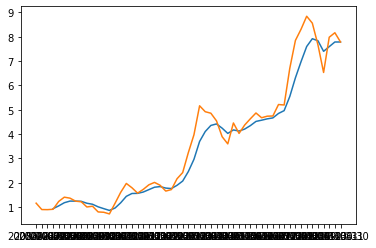

In [29]:
plt.plot(b)
plt.plot(check_df)